<a href="https://colab.research.google.com/github/bigmeco/tensorFlowTesting/blob/main/lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

In [11]:

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

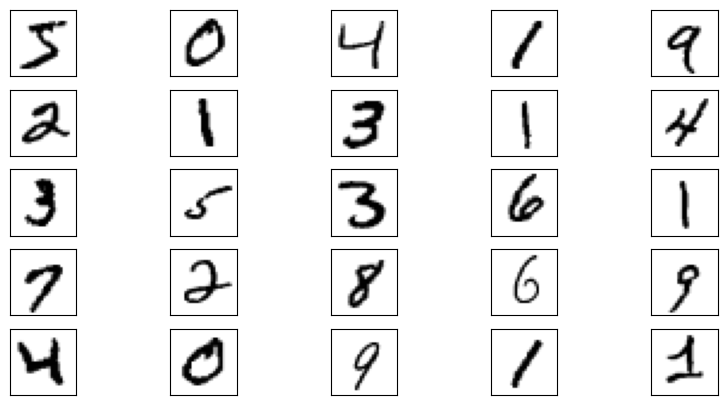

In [12]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [13]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2874 - accuracy: 0.9176 - val_loss: 0.1561 - val_accuracy: 0.9562
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1279 - accuracy: 0.9628 - val_loss: 0.1162 - val_accuracy: 0.9672
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0879 - accuracy: 0.9742 - val_loss: 0.0958 - val_accuracy: 0.9714
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0648 - accuracy: 0.9804 - val_loss: 0.0947 - val_accuracy: 0.9715
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0920 - val_accuracy: 0.9722


In [16]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0792 - accuracy: 0.9753


[0.07923448830842972, 0.9753000140190125]

In [17]:

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )


1/1 [==============================] - 0s 99ms/step
[[2.3104969e-08 4.5842929e-03 9.9477756e-01 4.7184920e-04 9.8868383e-14
  9.0127020e-07 6.6037069e-09 1.6321575e-10 1.6541791e-04 1.8073643e-10]]
2


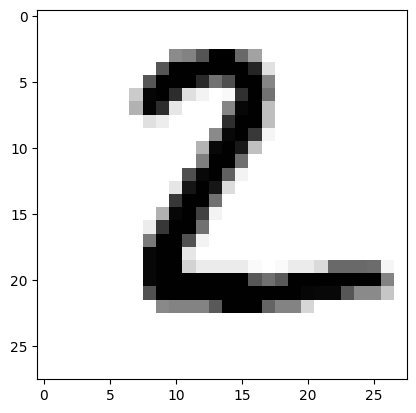

In [18]:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [19]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [20]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

[ True  True  True  True  True  True  True  True False  True]


In [21]:
x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

(247, 28, 28)


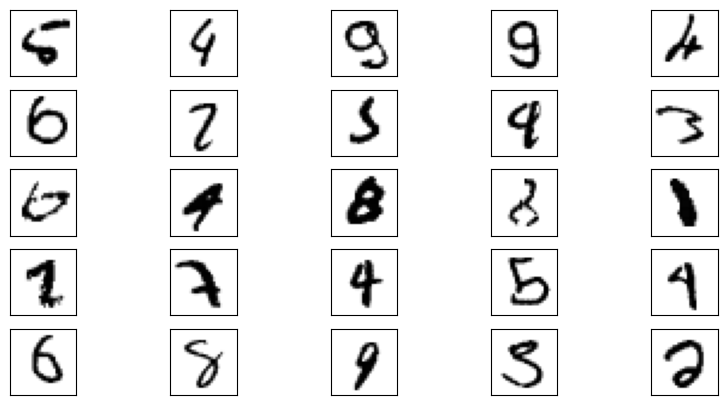

In [22]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()